# Entregable Etapa 3: Generación de Modelos de Aprendizaje y Evaluación de los mismos

Integrantes:

Joaquín Bravo García A00830890

Grisel Andrea Porras Franco A00830414

David Basilo Rodríguez Cortez A00830940

Eder Gersahi Martínez León A00831442

Giselle Sabbagh Debernardi A00831817



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Análisis de ciencia de datos/Reto/BD RIIEE 2021.csv')
df

,Fecha Acción,PEA,Año Acción,Periodo Acción,País,Tipo de Acción,Acción,ID Evento,Nombre Evento,Institución Acción,...,Apto,Destacado,Ingresados Si/No,Encuadre de Ingreso,Dirección,Área,Potencial Vigente,Información Real/No Real,Vacante Postulada,Ingresó
0,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento,TM,...,Apto,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 4,U,...,Apto,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 5,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 0,IY,...,Apto,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 4,TM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Comprensión de los datos del negocio

In [ ]:
df.columns

Index(['Fecha Acción', 'PEA', 'Año Acción', 'Periodo Acción', 'País',
       'Tipo de Acción ', 'Acción', 'ID Evento', 'Nombre Evento',
       'Institución Acción', 'Referente Ternium', 'Embajador Ternium',
       'ID Candidato', 'Correo electrónico', 'Correo institucional', 'Nombres',
       'Apellidos', 'Género', 'Nacionalidad', 'Universidad',
       'Carrera/Titulación', 'Carrera Gestional', 'Especialidad', 'Avance',
       'Semestres Totales', 'Status Académico', 'Postulados Si/No',
       'Evaluados Si/No', 'VIPS', 'NIPS', 'Inglés', 'Actividad Grupal',
       'Multimodelo Pymetrics', 'Perfil Pymetrics', 'Altamente Recomendado',
       'Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC',
       'Resto-Soft', 'Apto/No Apto', 'Destacado Pym', 'Actividad Grupal.1',
       'Apto AG', 'Destacado AG', 'Ingles', 'Apto', 'Destacado',
       'Ingresados Si/No', 'Encuadre de Ingreso', 'Dirección', 'Área',
       'Potencial Vigente', 'Información Real/No Real', 'Vacante Po

### a) Dimensión del dataset

In [ ]:
df.shape

(5853, 56)

In [ ]:
df.size

327768

### b) Describe claramente cada uno de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha Acción              5742 non-null   object 
 1   PEA                       5742 non-null   object 
 2   Año Acción                5742 non-null   float64
 3   Periodo Acción            5189 non-null   object 
 4   País                      5742 non-null   object 
 5   Tipo de Acción            5742 non-null   object 
 6   Acción                    5742 non-null   object 
 7   ID Evento                 2593 non-null   float64
 8   Nombre Evento             5742 non-null   object 
 9   Institución Acción        5742 non-null   object 
 10  Referente Ternium         965 non-null    object 
 11  Embajador Ternium         0 non-null      float64
 12  ID Candidato              2593 non-null   float64
 13  Correo electrónico        5741 non-null   object 
 14  Correo i

In [ ]:
df.describe()

,Año Acción,ID Evento,Embajador Ternium,ID Candidato,VIPS,NIPS,Inglés,Actividad Grupal,Multimodelo Pymetrics,Destacado AG,Encuadre de Ingreso,Dirección,Área,Potencial Vigente,Información Real/No Real,Vacante Postulada,Ingresó
count,5742.0,2.593000e+03,0.0,2.593000e+03,144.000000,144.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2021.0,2.211813e+08,NaN,1.868145e+08,64.340278,77.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,1.091741e+09,NaN,8.923400e+07,28.600739,23.720952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2021.0,1.202102e+08,NaN,1.022100e+07,7.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2021.0,1.202103e+08,NaN,1.304215e+08,48.000000,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021.0,1.202104e+08,NaN,1.904212e+08,76.000000,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021.0,1.202104e+08,NaN,2.303210e+08,86.000000,93.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2021.0,1.202101e+10,NaN,1.012101e+09,99.000000,99.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### c) Exploración de los datos

Variables cuantitativas:

- Medidas de tendencia central:promedio, media, mediana y moda de los datos.
- Medidas de dispersión: rango: máximo - mínimo, varianza, desviación estándar.

#### 1) Medidas estadísticas

In [ ]:
df.mean(numeric_only= True)

Año Acción                  2.021000e+03
ID Evento                   2.211813e+08
Embajador Ternium                    NaN
ID Candidato                1.868145e+08
VIPS                        6.434028e+01
NIPS                        7.737500e+01
Inglés                               NaN
Actividad Grupal                     NaN
Multimodelo Pymetrics                NaN
Destacado AG                         NaN
Encuadre de Ingreso                  NaN
Dirección                            NaN
Área                                 NaN
Potencial Vigente                    NaN
Información Real/No Real             NaN
Vacante Postulada                    NaN
Ingresó                              NaN
dtype: float64

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Año Acción                       2021.0
ID Evento                   120210413.0
Embajador Ternium                   NaN
ID Candidato                190421191.0
VIPS                               76.0
NIPS                               86.0
Inglés                              NaN
Actividad Grupal                    NaN
Multimodelo Pymetrics               NaN
Destacado AG                        NaN
Encuadre de Ingreso                 NaN
Dirección                           NaN
Área                                NaN
Potencial Vigente                   NaN
Información Real/No Real            NaN
Vacante Postulada                   NaN
Ingresó                             NaN
dtype: float64

In [ ]:
df.mode().head(1)

,Fecha Acción,PEA,Año Acción,Periodo Acción,País,Tipo de Acción,Acción,ID Evento,Nombre Evento,Institución Acción,...,Apto,Destacado,Ingresados Si/No,Encuadre de Ingreso,Dirección,Área,Potencial Vigente,Información Real/No Real,Vacante Postulada,Ingresó
0,01/09/2021,PEA 20-21,2021.0,Enero-Junio,México,Masiva,Eventos de Reclutamiento,120210413.0,Evento 46,UL,...,Apto,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Variables cualitativas:

- Tabla de distribución de frecuencia
- Moda



#### 2) Explora los datos usando herramientas de visualización

Variables cuantitativas:
Medidas de posición no-central: cuartiles, outlier (valores atípicos), boxplots

*   Variables cuantitativas:
    *   Medidas de posición no-central: cuartiles, outlier (valores atípicos), boxplots.
    *   Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica.
    *   Análisis de correlación  de los datos, mapa de color.






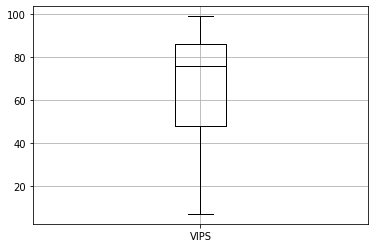

In [ ]:
df.boxplot(column=['VIPS'], grid=True, color='black')

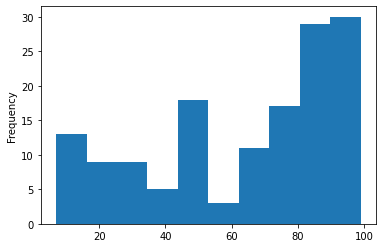

In [ ]:
dfH=df['VIPS']
dfH.plot.hist()

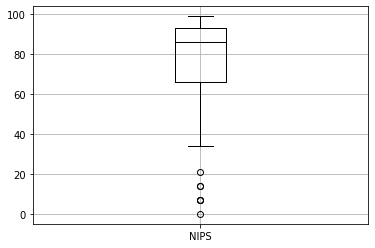

In [ ]:
df.boxplot(column=['NIPS'], grid=True, color='black')

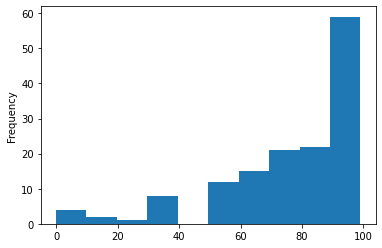

In [ ]:
dfH2=df['NIPS']
dfH2.plot.hist()

In [ ]:
r=df[['VIPS','NIPS']]
cor=r.corr(method='pearson')
cor

,VIPS,NIPS
VIPS,1.000000,0.442292
NIPS,0.442292,1.000000


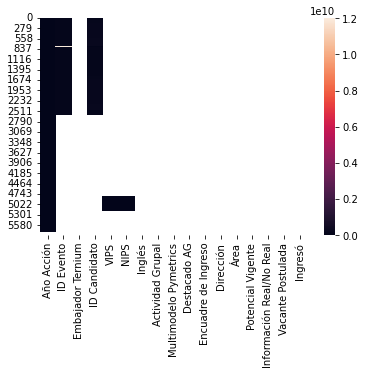

In [ ]:
import seaborn as sns
numericas = df.select_dtypes(include = ["float64"])
sns.heatmap(numericas)

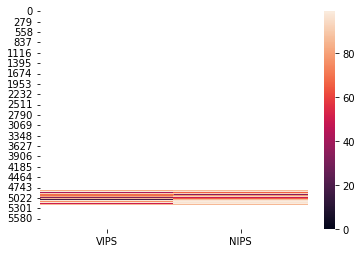

In [ ]:
sns.heatmap(r)

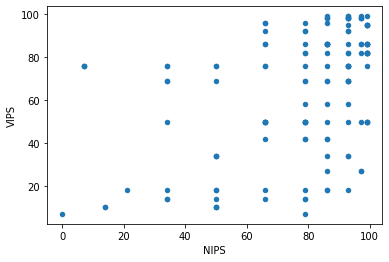

In [ ]:
r.plot.scatter(x='NIPS',y='VIPS')



*   Variables categóricas
  *   Distribución de los datos (diagramas de barras, diagramas de pastel)




In [ ]:
from matplotlib import pyplot as plt

columnas = ['Fecha Acción', 'PEA', 'Periodo Acción', 'País',
       'Tipo de Acción ', 'Acción', 'Nombre Evento',
       'Institución Acción', 'Referente Ternium',
       'Género', 'Nacionalidad', 'Universidad',
       'Carrera/Titulación', 'Carrera Gestional', 'Especialidad', 'Avance',
       'Semestres Totales', 'Status Académico', 'Postulados Si/No',
       'Evaluados Si/No', 'Perfil Pymetrics', 'Altamente Recomendado',
       'Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC',
       'Resto-Soft', 'Apto/No Apto', 'Destacado Pym', 'Actividad Grupal.1',
       'Apto AG', 'Ingles', 'Apto', 'Destacado',
       'Ingresados Si/No']

for col in columnas:
  print('********** Exploración sobre',col,'**********')
  print(df[col].value_counts())
  print(df[col].mode())
  # ax = df[col].value_counts().plot(kind='barh', figsize=(14,8))
  # plt.show()
  print('\n')

********** Exploración sobre Fecha Acción **********
01/09/2021                  795
13/04/2021                  702
29 - 01 de dezembro/2021    350
08/10/2021                  319
21/04/2021                  260
                           ... 
30/09/2021                    1
29/09/2021                    1
28/09/2021                    1
13/09/2021                    1
12/11/2021                    1
Name: Fecha Acción, Length: 97, dtype: int64
0    01/09/2021
dtype: object


********** Exploración sobre PEA **********
PEA 20-21    2936
PEA 21-22    2806
Name: PEA, dtype: int64
0    PEA 20-21
dtype: object


********** Exploración sobre Periodo Acción **********
Enero-Junio        2936
Julio-Diciembre    2253
Name: Periodo Acción, dtype: int64
0    Enero-Junio
dtype: object


********** Exploración sobre País **********
México       4806
Brasil        553
Argentina     383
Name: País, dtype: int64
0    México
dtype: object


********** Exploración sobre Tipo de Acción  **********
Masi

### d) Verifica la calidad de los datos: valores faltantes, valores de los datos, ortografía

In [ ]:

nan_count = df.isnull().sum()
nan_count[0:56]

Fecha Acción                 111
PEA                          111
Año Acción                   111
Periodo Acción               664
País                         111
Tipo de Acción               111
Acción                       111
ID Evento                   3260
Nombre Evento                111
Institución Acción           111
Referente Ternium           4888
Embajador Ternium           5853
ID Candidato                3260
Correo electrónico           112
Correo institucional         112
Nombres                      112
Apellidos                    112
Género                       112
Nacionalidad                2705
Universidad                  111
Carrera/Titulación           706
Carrera Gestional            470
Especialidad                1150
Avance                      1482
Semestres Totales           2214
Status Académico            3258
Postulados Si/No            4367
Evaluados Si/No             4661
VIPS                        5709
NIPS                        5709
Inglés    

In [ ]:
totalC = np.product(df.shape)
totalM = nan_count.sum()
print("El porcentaje de datos faltantes en la base de datos es de:")
(totalM/totalC) * 100


El porcentaje de datos faltantes en la base de datos es de:


59.971992384857586

# Preparación de los datos

## 1. Selecciona el conjunto de datos a utilizar.

Aquí falta esto
a) Decide qué conjunto de datos se utilizará. Explica por qué se incluyeron o excluyeron ciertos datos.
b) Identifica columna objetivo

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Análisis de ciencia de datos/Reto/BD RIIEE 2021.csv')


In [ ]:
df = df[df['País'] == 'México']
df

,Fecha Acción,PEA,Año Acción,Periodo Acción,País,Tipo de Acción,Acción,ID Evento,Nombre Evento,Institución Acción,...,Apto,Destacado,Ingresados Si/No,Encuadre de Ingreso,Dirección,Área,Potencial Vigente,Información Real/No Real,Vacante Postulada,Ingresó
0,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento,TM,...,Apto,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 4,U,...,Apto,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 5,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 0,IY,...,Apto,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 4,TM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,20/20/2021,PEA 21-22,2021.0,Julio-Diciembre,México,Masiva,Eventos de Reclutamiento,NaN,Evento 68,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4802,20/20/2021,PEA 21-22,2021.0,Julio-Diciembre,México,Masiva,Eventos de Reclutamiento,NaN,Evento 68,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4803,20/20/2021,PEA 21-22,2021.0,Julio-Diciembre,México,Masiva,Eventos de Reclutamiento,NaN,Evento 68,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4804,20/20/2021,PEA 21-22,2021.0,Julio-Diciembre,México,Masiva,Eventos de Reclutamiento,NaN,Evento 68,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop_duplicates(subset ="ID Candidato",
                     keep = False, inplace = True)
df = df.drop(['Embajador Ternium', 'Destacado AG', 'Inglés', 'Actividad Grupal', 'Multimodelo Pymetrics',
       'Encuadre de Ingreso', 'Dirección', 'Área', 'Status Académico',
       'Potencial Vigente', 'Información Real/No Real', 'Vacante Postulada',
       'Ingresó', 'VIPS', 'NIPS', 'Apto AG', 'Destacado Pym', 'Universidad'], axis=1)
df = df.drop(['Fecha Acción', 'PEA', 'Año Acción', 'Periodo Acción', 'País',
       'Tipo de Acción ', 'Acción', 'ID Evento', 'Nombre Evento', 'Apto', 'Apto/No Apto',
       'Institución Acción', 'Referente Ternium', 'Postulados Si/No', 'Perfil Pymetrics',
       'ID Candidato', 'Correo electrónico', 'Correo institucional', 'Nombres',
       'Apellidos', 'Género', 'Nacionalidad'], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df

,Carrera/Titulación,Carrera Gestional,Especialidad,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Ingresados Si/No
0,Ing. Industrial,Ing. Industrial,Ingenierías Target,NaN,NaN,Si,Si,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,5,B2 - High Intermediate,Si,Si
1,Ing. Industrial,Ing. Industrial,Ingenierías Target,6,9,Si,Si,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,5,B2 - High Intermediate,Si,NaN
2,Ing. Industrial,Ing. Industrial,Ingenierías Target,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ing. Mecatrónica,Ing. Mecatrónica/Electrónica,Ingenierías Target,6,9,Si,Si,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,5,B2 - High Intermediate,Si,Si
4,Comercio Exterior,Negocios Internacionales,Negocios,NaN,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,Administración,Administración,Negocios,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2589,Administración,Administración,Negocios,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2590,Administración,Administración,Negocios,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2591,Administración,Administración,Negocios,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593 entries, 0 to 2592
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Carrera/Titulación      2593 non-null   object
 1   Carrera Gestional       2593 non-null   object
 2   Especialidad            2593 non-null   object
 3   Avance                  2547 non-null   object
 4   Semestres Totales       1815 non-null   object
 5   Evaluados Si/No         509 non-null    object
 6   Altamente Recomendado   239 non-null    object
 7   Operaciones-Calidad     432 non-null    object
 8   MTTO-DIMA               432 non-null    object
 9   Comercial-Planeamiento  432 non-null    object
 10  DIGI-SC                 432 non-null    object
 11  Resto-Soft              432 non-null    object
 12  Actividad Grupal.1      45 non-null     object
 13  Ingles                  124 non-null    object
 14  Destacado               25 non-null     object
 15  Ingr

In [ ]:
df.columns

Index(['Carrera/Titulación', 'Carrera Gestional', 'Especialidad', 'Avance',
       'Semestres Totales', 'Evaluados Si/No', 'Altamente Recomendado',
       'Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC',
       'Resto-Soft', 'Actividad Grupal.1', 'Ingles', 'Destacado',
       'Ingresados Si/No'],
      dtype='object')

## 2. Limpieza de datos

### Limpieza de columnas numéricas

#### Sustituir datos faltantes en Avance

In [ ]:
df['Avance'].unique()

array([nan, '6', '8', '9', '10', '7', '5', '4', '12', '11', 'Egresado',
       '2', '3'], dtype=object)

In [ ]:
notegresados = df[df.Avance != 'Egresado']
notegresados['Avance'] = notegresados['Avance'].apply(pd.to_numeric, errors='coerce')
notegresados.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Avance    7.47685
dtype: float64

In [ ]:
df['Avance'] = df['Avance'].fillna(7)
df['Avance'].replace({'Egresado':13}, inplace=True)
df['Avance'] = df['Avance'].apply(pd.to_numeric, errors='coerce')

#### Sustituir datos faltantes en Semestres Totales

In [ ]:
df['Semestres Totales'].unique()

array([nan, '9', '10'], dtype=object)

In [ ]:
df['Semestres Totales'] = df['Semestres Totales'].apply(pd.to_numeric, errors='coerce')
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Avance               7.971076
Semestres Totales    9.623691
dtype: float64

In [ ]:
df['Semestres Totales'] = df['Semestres Totales'].fillna(10)
df['Semestres Totales'].unique()

array([10.,  9.])

In [ ]:
#Utilizar las reglas proporcionadas por la empresa para determinar si es o no apto
#considerando que el postulante pueda ser practicante con respecto a su avance de estudios:
# df['Filtro 1'] = df['Semestres Totales']-df['Avance']
# df['Filtro 1'] = np.where((df['Filtro 1']> 1) & (df['Avance'] >= 5), 'Aplica', 'No aplica')

df = df[(df['Avance'] > 4)]
vacante = np.where((df['Semestres Totales']-df['Avance'] > 1) & (df['Avance'] != 13), 'Practicante', 'Profesional')
df.insert(3, 'Vacante', vacante)

In [ ]:
df.Vacante.value_counts()

Practicante    1238
Profesional    1093
Name: Vacante, dtype: int64

### Gráficas

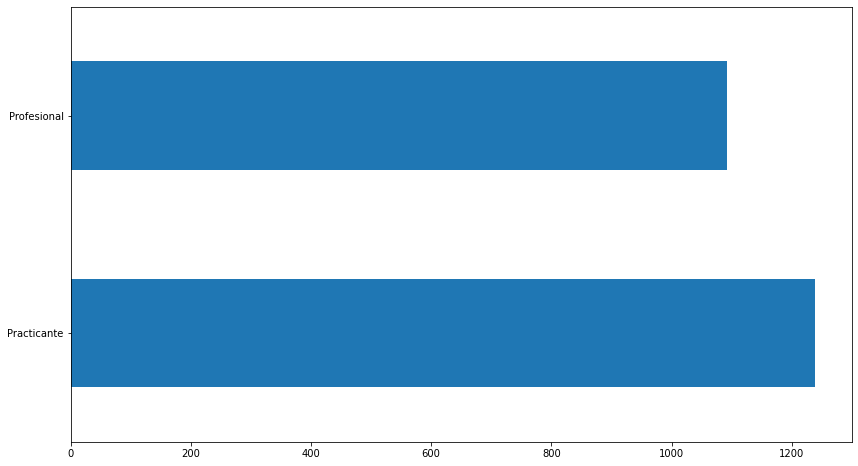

In [ ]:
from matplotlib import pyplot as plt

ax = df['Vacante'].value_counts().plot(kind='barh', figsize=(14,8))
plt.show()

### Limpieza de columnas binarias

In [ ]:
colBinarias = ['Evaluados Si/No', 'Altamente Recomendado', 'Destacado', 'Ingresados Si/No']

# dict_orthography = {'No':'No', 'no':'No', 'NO':'No', 'nO':'No', 'Sí':'Sí', 'Si':'Sí', 'SÍ':'Sí'}
dict_binary = {np.nan:0, 'No':0, 'no':0, 'NO':0, 'nO':0, 'Sí':1, 'Si':1, 'SÍ':1, 'Lic. Química': 'Química', 'Lic. en Química': 'Química'}
for col in colBinarias:
  # df.replace({col : dict_orthography}, inplace=True)
  # # df[col] = df[col].fillna(df[col].mode())
  # df.replace({col: {np.nan:df[col].mode()}}, inplace=True)
  df.replace({col: dict_binary}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2592
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Carrera/Titulación      2331 non-null   object 
 1   Carrera Gestional       2331 non-null   object 
 2   Especialidad            2331 non-null   object 
 3   Vacante                 2331 non-null   object 
 4   Avance                  2331 non-null   int64  
 5   Semestres Totales       2331 non-null   float64
 6   Evaluados Si/No         2331 non-null   int64  
 7   Altamente Recomendado   2331 non-null   int64  
 8   Operaciones-Calidad     423 non-null    object 
 9   MTTO-DIMA               423 non-null    object 
 10  Comercial-Planeamiento  423 non-null    object 
 11  DIGI-SC                 423 non-null    object 
 12  Resto-Soft              423 non-null    object 
 13  Actividad Grupal.1      44 non-null     object 
 14  Ingles                  122 non-null    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Limpieza en columnas categóricas

Do Not Recommend: 0  
Recommend: 1  
Highly Recommend: 2

In [ ]:
colCategoricas = ['Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC', 'Resto-Soft']

dict_categorical = {np.nan:0, 'Do Not Recommend':0, 'Recommend':1, 'Highly Recommend':2}
for col in colCategoricas:
  # df[col] = df[col].fillna(df[col].mode())
  # df.replace({col: {np.nan:df[col].mode()}}, inplace=True)
  df.replace({col: dict_categorical},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# df.replace({'Actividad Grupal.1': {np.nan : 4}})
df.replace({'Actividad Grupal.1': {np.nan:0, 1:0, 2:0, 3:1, 4:1, 5:2, 6:2}},inplace=True)
df['Actividad Grupal.1'] = df['Actividad Grupal.1'].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# df.replace({'Ingles' : {np.nan : df['Ingles'].mode()}})
df.replace({'Ingles': {np.nan :1, 'B2 - High Intermediate':2, 'B1 - Low Intermediate':2,
       'A1 - Low Beginner':1, 'A2 - High Beginner':1, 'C2 - Mastery':2,
       'C1 - Advanced':2, 'False Beginner':1, 'Late hangup':1 }},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2592
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Carrera/Titulación      2331 non-null   object 
 1   Carrera Gestional       2331 non-null   object 
 2   Especialidad            2331 non-null   object 
 3   Vacante                 2331 non-null   object 
 4   Avance                  2331 non-null   int64  
 5   Semestres Totales       2331 non-null   float64
 6   Evaluados Si/No         2331 non-null   int64  
 7   Altamente Recomendado   2331 non-null   int64  
 8   Operaciones-Calidad     2331 non-null   int64  
 9   MTTO-DIMA               2331 non-null   int64  
 10  Comercial-Planeamiento  2331 non-null   int64  
 11  DIGI-SC                 2331 non-null   int64  
 12  Resto-Soft              2331 non-null   int64  
 13  Actividad Grupal.1      2331 non-null   int64  
 14  Ingles                  2331 non-null   

-------------------------------------------------------------------------------

In [ ]:
df

,Carrera/Titulación,Carrera Gestional,Especialidad,Vacante,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Ingresados Si/No
0,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,7,10.0,1,1,2,1,2,0,0,5,2,1,1
1,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,6,9.0,1,1,2,0,0,0,0,5,2,1,0
2,Ing. Industrial,Ing. Industrial,Ingenierías Target,Profesional,8,9.0,0,0,0,0,0,0,0,0,1,0,0
3,Ing. Mecatrónica,Ing. Mecatrónica/Electrónica,Ingenierías Target,Practicante,6,9.0,1,1,2,2,0,1,2,5,2,1,1
4,Comercio Exterior,Negocios Internacionales,Negocios,Practicante,7,10.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0
2587,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0
2588,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0
2590,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0


## 3. Transformación de Datos:

Debido a que no se contaba con muchas variables numéricas y con las que se contaban eran valores muy cercanos, no vimos la necesidad de discretizar ni normalizar los datos.

### Crear atributo para determinar si es apto




In [ ]:
df

,Carrera/Titulación,Carrera Gestional,Especialidad,Vacante,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Ingresados Si/No
0,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,7,10.0,1,1,2,1,2,0,0,5,2,1,1
1,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,6,9.0,1,1,2,0,0,0,0,5,2,1,0
2,Ing. Industrial,Ing. Industrial,Ingenierías Target,Profesional,8,9.0,0,0,0,0,0,0,0,0,1,0,0
3,Ing. Mecatrónica,Ing. Mecatrónica/Electrónica,Ingenierías Target,Practicante,6,9.0,1,1,2,2,0,1,2,5,2,1,1
4,Comercio Exterior,Negocios Internacionales,Negocios,Practicante,7,10.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0
2587,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0
2588,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0
2590,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
def conditions(s):
  if (s['Altamente Recomendado'] == 19):
    return 2
  elif (s['Operaciones-Calidad']==2 or s['MTTO-DIMA']==2 or s['Comercial-Planeamiento']==2 or s['DIGI-SC']==2):
    return 2
  elif (s['Operaciones-Calidad']==1 or s['MTTO-DIMA']==1 or s['Comercial-Planeamiento']==1 or s['DIGI-SC']==1):
    return 1
  elif (s['Resto-Soft'] == 2):
    return 1
  elif (s['Operaciones-Calidad']==0 and s['MTTO-DIMA']==0 and s['Comercial-Planeamiento']==0 and s['DIGI-SC']==0):
    return 0
  elif (s['Actividad Grupal.1'] == 2):
    return 2
  elif (s['Actividad Grupal.1'] == 1):
    return 1
  elif (s['Actividad Grupal.1'] == 0):
    return 0
  elif (s['Ingles'] == 2):
    return 2
  elif (s['Ingles'] == 1):
    return 1

df['Apto'] = df.apply(conditions, axis=1)
df.Apto.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    1993
2     233
1     105
Name: Apto, dtype: int64

(array([1993.,    0.,    0.,    0.,    0.,  105.,    0.,    0.,    0.,
         233.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

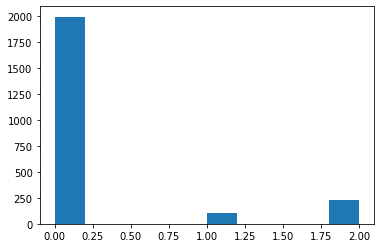

In [ ]:
from matplotlib import pyplot as plt

plt.hist(df['Apto'])

In [ ]:
df['Apto suma'] = df['Altamente Recomendado'] + df['Operaciones-Calidad'] + df['MTTO-DIMA'] + df['Comercial-Planeamiento'] + df['DIGI-SC'] + df['Actividad Grupal.1'] + df['Ingles']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Carrera/Titulación,Carrera Gestional,Especialidad,Vacante,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Ingresados Si/No,Apto,Apto suma
0,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,7,10.0,1,1,2,1,2,0,0,5,2,1,1,2,13
1,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,6,9.0,1,1,2,0,0,0,0,5,2,1,0,2,10
2,Ing. Industrial,Ing. Industrial,Ingenierías Target,Profesional,8,9.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,Ing. Mecatrónica,Ing. Mecatrónica/Electrónica,Ingenierías Target,Practicante,6,9.0,1,1,2,2,0,1,2,5,2,1,1,2,13
4,Comercio Exterior,Negocios Internacionales,Negocios,Practicante,7,10.0,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0,0,1
2587,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0,0,1
2588,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0,0,1
2590,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0,0,1


(array([2.071e+03, 1.700e+01, 1.120e+02, 4.400e+01, 2.800e+01, 3.200e+01,
        1.000e+01, 1.200e+01, 4.000e+00, 1.000e+00]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <a list of 10 Patch objects>)

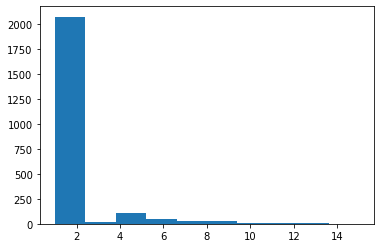

In [ ]:
from matplotlib import pyplot as plt

plt.hist(df['Apto suma'])

In [ ]:
df['Apto suma'].value_counts()

1     1997
2       74
4       69
6       44
5       43
7       28
3       17
9       16
8       16
10      10
12       6
11       6
13       4
15       1
Name: Apto suma, dtype: int64

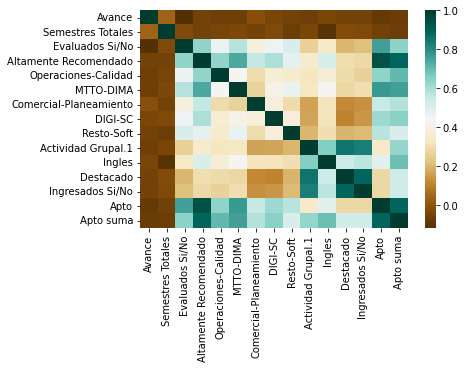

In [ ]:
import seaborn as sns
num = df.select_dtypes(include = ["float64", "int64"])
sns.heatmap(df.corr(),cmap='BrBG')

# Generación de Modelos de Aprendizaje y Evaluación de los mismos
Grisel Andrea Porras Franco

#### Vista general del dataset

1. Muestra la información general del set de datos a utilizar para la fase de modelación de datos.

In [ ]:
df.describe()

,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Ingresados Si/No,Apto,Apto suma
count,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,8.436722,9.781639,0.213213,0.099957,0.096096,0.144573,0.071643,0.087516,0.108966,0.067782,1.030030,0.010725,0.012441,0.244959,1.597598
std,2.057063,0.413223,0.409665,0.300007,0.398750,0.480646,0.350986,0.364843,0.410340,0.502906,0.170707,0.103027,0.110867,0.620511,1.787240
min,5.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,8.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,13.000000,10.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,1.000000,1.000000,2.000000,15.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2592
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Carrera/Titulación      2331 non-null   object 
 1   Carrera Gestional       2331 non-null   object 
 2   Especialidad            2331 non-null   object 
 3   Vacante                 2331 non-null   object 
 4   Avance                  2331 non-null   int64  
 5   Semestres Totales       2331 non-null   float64
 6   Evaluados Si/No         2331 non-null   int64  
 7   Altamente Recomendado   2331 non-null   int64  
 8   Operaciones-Calidad     2331 non-null   int64  
 9   MTTO-DIMA               2331 non-null   int64  
 10  Comercial-Planeamiento  2331 non-null   int64  
 11  DIGI-SC                 2331 non-null   int64  
 12  Resto-Soft              2331 non-null   int64  
 13  Actividad Grupal.1      2331 non-null   int64  
 14  Ingles                  2331 non-null   

In [ ]:
df.columns

Index(['Carrera/Titulación', 'Carrera Gestional', 'Especialidad', 'Vacante',
       'Avance', 'Semestres Totales', 'Evaluados Si/No',
       'Altamente Recomendado', 'Operaciones-Calidad', 'MTTO-DIMA',
       'Comercial-Planeamiento', 'DIGI-SC', 'Resto-Soft', 'Actividad Grupal.1',
       'Ingles', 'Destacado', 'Ingresados Si/No', 'Apto', 'Apto suma'],
      dtype='object')

#### Selección de características


2. Define la variable target, o de respuesta (dependiente) y las features o variables predictoras (independientes)

Determinar si la persona es Destacada, Apta o No apta para el trabajo dependiendo si fue clasificada como ingresada o no.

Target = 'Ingresado'

Definimos como variables predictoras o features las siguientes features
Predictores  = 

In [ ]:
target = 'Ingresados Si/No'
df[target].value_counts()

0    2302
1      29
Name: Ingresados Si/No, dtype: int64

In [ ]:
#Defino los datos correspondientes a las etiquetas
#y=df.Apto
y = df[target]

#Seleccionamos todas las columnas pertinentes como nuestras variables predictivas para nuestro modelo
#X = df.drop(['Altamente Recomendado','Carrera/Titulación', 'Carrera Gestional', 'Especialidad', 'Vacante', 'Avance', 'Semestres Totales', 'Evaluados Si/No',"Ingresados Si/No"], axis=1)

#X = df.drop(['Carrera/Titulación', 'Carrera Gestional', 'Especialidad', 'Vacante','Avance', 'Semestres Totales', 'Evaluados Si/No',
      # 'Altamente Recomendado', 'Operaciones-Calidad', 'MTTO-DIMA',
       #'Comercial-Planeamiento', 'DIGI-SC', 'Resto-Soft', 'Actividad Grupal.1',
       #'Ingles',target], axis = 1)
X = df.drop(['Carrera/Titulación', 'Carrera Gestional', 'Especialidad', 'Vacante',
       'Avance', 'Semestres Totales', 'Evaluados Si/No', 'Altamente Recomendado',target], axis = 1)

In [ ]:
features = X.columns
features

Index(['Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC',
       'Resto-Soft', 'Actividad Grupal.1', 'Ingles', 'Destacado', 'Apto',
       'Apto suma'],
      dtype='object')

In [ ]:
y

0       1
1       0
2       0
3       1
4       0
       ..
2586    0
2587    0
2588    0
2590    0
2592    0
Name: Ingresados Si/No, Length: 2331, dtype: int64

In [ ]:
X

,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Apto,Apto suma
0,2,1,2,0,0,5,2,1,2,13
1,2,0,0,0,0,5,2,1,2,10
2,0,0,0,0,0,0,1,0,0,1
3,2,2,0,1,2,5,2,1,2,13
4,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2586,0,0,0,0,0,0,1,0,0,1
2587,0,0,0,0,0,0,1,0,0,1
2588,0,0,0,0,0,0,1,0,0,1
2590,0,0,0,0,0,0,1,0,0,1


#### Importar librerías, modelos y separar los datos para su entrenamiento y prueba

In [ ]:
#importar las librerías necesarias para probar los modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier



In [ ]:
#modelos a probar
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(probability = True,max_iter = 1000)))
models.append(('LR', LogisticRegression(max_iter = 1000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
#redes neuronales
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df[target], random_state=0)

#### Prueba y evaluación de modelos (sin ajustes)

Modelo actual:  KNN
Matriz de confusión
: [[572   4]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       576
           1       0.60      0.86      0.71         7

    accuracy                           0.99       583
   macro avg       0.80      0.93      0.85       583
weighted avg       0.99      0.99      0.99       583

True Positives TP: 6
True Negatives TN: 572
False Positives FP: 4
False Negatives FN: 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


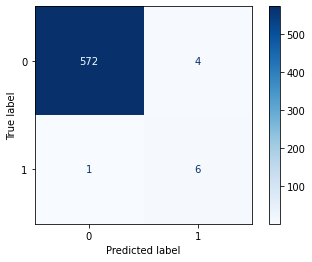


Accuracy =  0.9914236706689536
Sensitivity = 0.8571428571428571
Precision =  0.6
Especifividad =  0.9930555555555556
F1 score =  0.7058823529411764
AUC: 0.9268353174603174


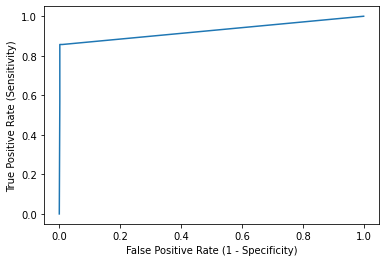

Modelo actual:  SVC
Matriz de confusión
: [[573   3]
 [  2   5]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       576
           1       0.62      0.71      0.67         7

    accuracy                           0.99       583
   macro avg       0.81      0.85      0.83       583
weighted avg       0.99      0.99      0.99       583

True Positives TP: 5
True Negatives TN: 573
False Positives FP: 3
False Negatives FN: 2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


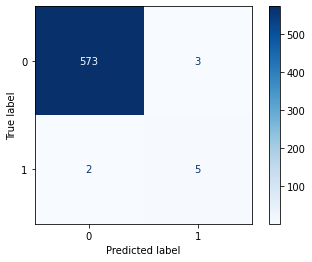


Accuracy =  0.9914236706689536
Sensitivity = 0.7142857142857143
Precision =  0.625
Especifividad =  0.9947916666666666
F1 score =  0.6666666666666666
AUC: 0.8675595238095238


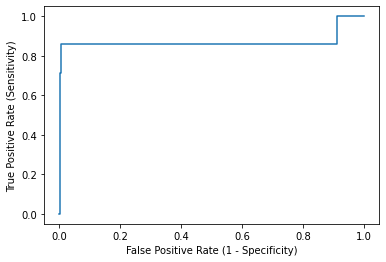

Modelo actual:  LR
Matriz de confusión
: [[572   4]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       576
           1       0.60      0.86      0.71         7

    accuracy                           0.99       583
   macro avg       0.80      0.93      0.85       583
weighted avg       0.99      0.99      0.99       583

True Positives TP: 6
True Negatives TN: 572
False Positives FP: 4
False Negatives FN: 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


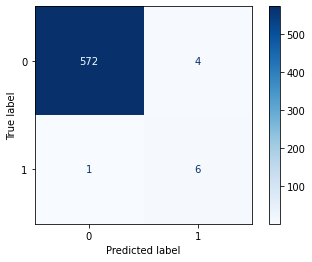


Accuracy =  0.9914236706689536
Sensitivity = 0.8571428571428571
Precision =  0.6
Especifividad =  0.9930555555555556
F1 score =  0.7058823529411764
AUC: 0.9856150793650794


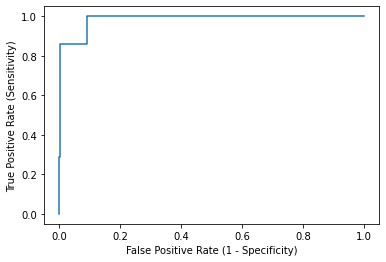

Modelo actual:  DT
Matriz de confusión
: [[574   2]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       0.75      0.86      0.80         7

    accuracy                           0.99       583
   macro avg       0.87      0.93      0.90       583
weighted avg       1.00      0.99      1.00       583

True Positives TP: 6
True Negatives TN: 574
False Positives FP: 2
False Negatives FN: 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


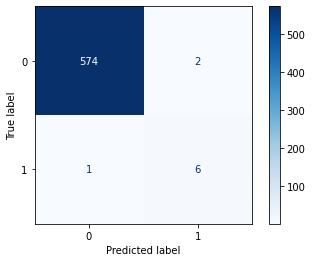


Accuracy =  0.9948542024013722
Sensitivity = 0.8571428571428571
Precision =  0.75
Especifividad =  0.9965277777777778
F1 score =  0.7999999999999999
AUC: 0.9268353174603174


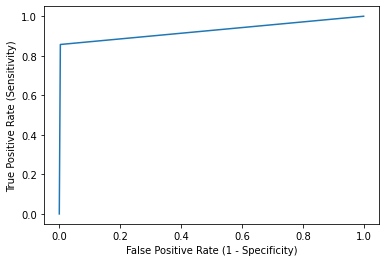

Modelo actual:  GNB
Matriz de confusión
: [[551  25]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       576
           1       0.19      0.86      0.32         7

    accuracy                           0.96       583
   macro avg       0.60      0.91      0.65       583
weighted avg       0.99      0.96      0.97       583

True Positives TP: 6
True Negatives TN: 551
False Positives FP: 25
False Negatives FN: 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


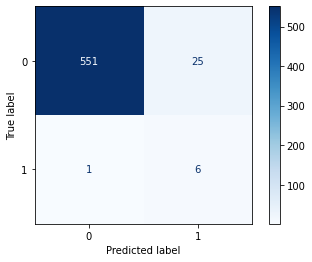


Accuracy =  0.9554030874785592
Sensitivity = 0.8571428571428571
Precision =  0.1935483870967742
Especifividad =  0.9565972222222222
F1 score =  0.3157894736842105
AUC: 0.9821428571428571


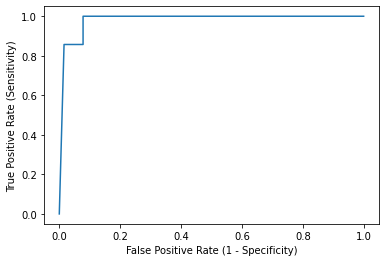

Modelo actual:  RF
Matriz de confusión
: [[575   1]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       0.86      0.86      0.86         7

    accuracy                           1.00       583
   macro avg       0.93      0.93      0.93       583
weighted avg       1.00      1.00      1.00       583

True Positives TP: 6
True Negatives TN: 575
False Positives FP: 1
False Negatives FN: 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


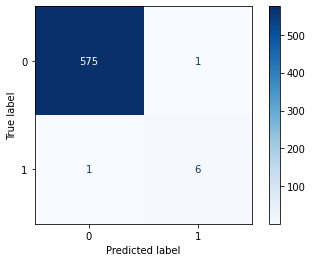


Accuracy =  0.9965694682675815
Sensitivity = 0.8571428571428571
Precision =  0.8571428571428571
Especifividad =  0.9982638888888888
F1 score =  0.8571428571428571
AUC: 0.9981398809523809


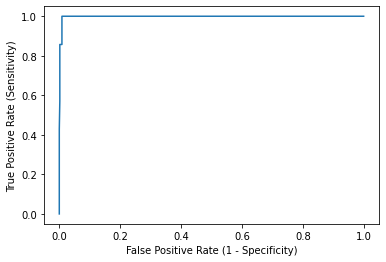

Modelo actual:  GB
Matriz de confusión
: [[574   2]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       0.75      0.86      0.80         7

    accuracy                           0.99       583
   macro avg       0.87      0.93      0.90       583
weighted avg       1.00      0.99      1.00       583

True Positives TP: 6
True Negatives TN: 574
False Positives FP: 2
False Negatives FN: 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


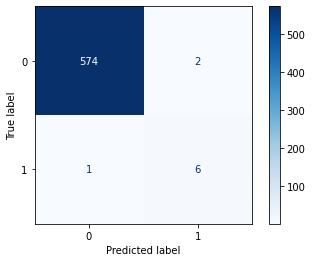


Accuracy =  0.9948542024013722
Sensitivity = 0.8571428571428571
Precision =  0.75
Especifividad =  0.9965277777777778
F1 score =  0.7999999999999999
AUC: 0.9269593253968254


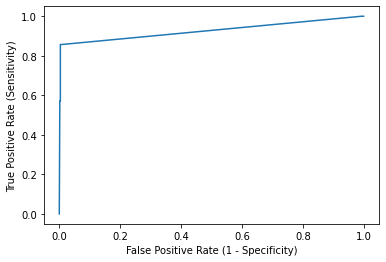

Modelo actual:  MLP
Matriz de confusión
: [[571   5]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       576
           1       0.55      0.86      0.67         7

    accuracy                           0.99       583
   macro avg       0.77      0.92      0.83       583
weighted avg       0.99      0.99      0.99       583

True Positives TP: 6
True Negatives TN: 571
False Positives FP: 5
False Negatives FN: 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


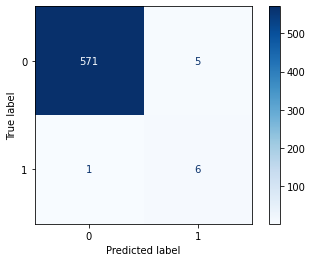


Accuracy =  0.9897084048027445
Sensitivity = 0.8571428571428571
Precision =  0.5454545454545454
Especifividad =  0.9913194444444444
F1 score =  0.6666666666666665
AUC: 0.8559027777777777


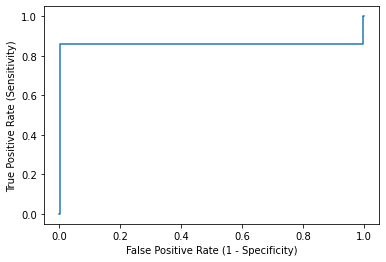

In [ ]:
from sklearn.metrics import plot_confusion_matrix
names = []
accuracy = []
sensitivity = []
precision = []
especifidad = []
aucs = []
f1s = []
for name, model in models:
    names.append(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_pred)
    print('Modelo actual: ', name)
    print('Matriz de confusión\n:',cfm)
    print(classification_report(y_test, y_pred))
    # save confusion matrix and slice into four pieces
    confusion = confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    print("True Positives TP:", TP)
    TN = confusion[0, 0]
    print("True Negatives TN:", TN)
    FP = confusion[0, 1]
    print("False Positives FP:", FP)
    FN = confusion[1, 0]
    print("False Negatives FN:", FN)
    plot_confusion_matrix(model, X_test, y_test,cmap="Blues")
    plt.show()

    
    accu = accuracy_score(y_test, y_pred)
    sens =TP / float(FN + TP)
    pres =  TP / float(TP + FP)
    espe =TN / (TN + FP)
    f1 = metrics.f1_score(y_test, y_pred)
    
    accuracy.append(accu)
    sensitivity.append(sens)
    precision.append(pres)
    especifidad.append(espe)
    f1s.append (f1)
    print("\nAccuracy = ",accu )  
    print("Sensitivity =" ,sens )
    print("Precision = ",pres) 
    print("Especifividad = ",espe )
    print("F1 score = ",f1)

    
    
    y_pred_prod_pos = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prod_pos)
    auc = metrics.roc_auc_score(y_test, y_pred_prod_pos)
    aucs.append(auc)
    print("AUC:",auc )
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')

    plt.show()
    
    

In [ ]:
tr_split = pd.DataFrame({'Name': names, 'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Precision': precision, 'Especifidad': especifidad, 'F1 score': f1s,'AUC': aucs})
tr_split.transpose()

,0,1,2,3,4,5,6,7
Name,KNN,SVC,LR,DT,GNB,RF,GB,MLP
Accuracy,0.991424,0.991424,0.991424,0.994854,0.955403,0.996569,0.994854,0.989708
Sensitivity,0.857143,0.714286,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143
Precision,0.6,0.625,0.6,0.75,0.193548,0.857143,0.75,0.545455
Especifidad,0.993056,0.994792,0.993056,0.996528,0.956597,0.998264,0.996528,0.991319
F1 score,0.705882,0.666667,0.705882,0.8,0.315789,0.857143,0.8,0.666667
AUC,0.926835,0.86756,0.985615,0.926835,0.982143,0.99814,0.926959,0.855903


Tomando en cuenta lo anterior, los mejores modelos fueron DT, RF y GB. Si consideramos las métricas, todos los modelos fueron bastante buenos, el modelo que tuvo los menojores puntajes fue el de Precision, por lo que tenemos el tipo de error de tipo 1 en nuestro problema. En el futuro es mejor elegir otros hiperparámetros para poder hacer un modelo más efectivo y mejorar estas métricas.

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 61 kB 214 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=1e644116f62056375d72d86601592b1761eb2ec2a99aa7d631bb8568aa87657e
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atlea

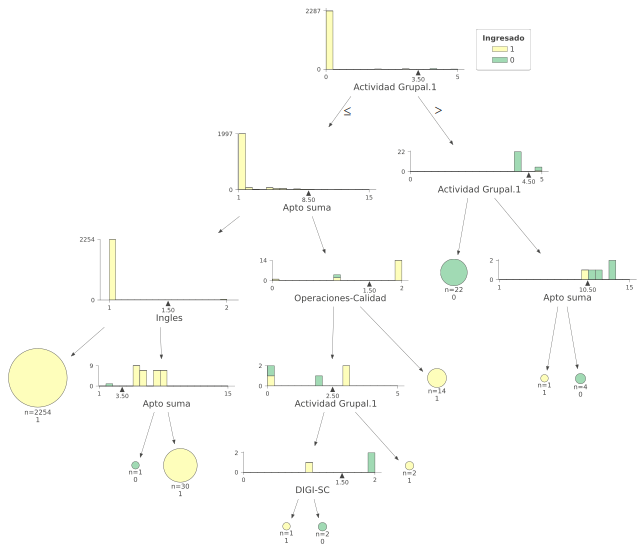

In [ ]:
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
clf = models[3][1]
model = clf.fit(X, y)
viz = trees.dtreeviz(clf, X, y,
                target_name="Ingresado",
                feature_names=X.columns,
                class_names=list(df[target])
                )

viz

# Evaluación de modelos

#### Prueba y evaluación de modelos (con ajustes)

#### Manejo del desbalanceo de datos

De acuerdo con la forma del dataset, la columna objetivo se divide en dos posibles resultados, si la persona ingresa o no a la compañía. En relación con lo anterior, la proporción de las que entran a comparación de las que no es mucho más pequeña. Esto, al igual que la base de datos es muy pequeña pudo haber sido la razón por la que existan problemas de overfitting. Por ello, se maneja este problema por medio del desbalanceo de datos.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=888)
X_resampled, y_resampled = ros.fit_resample(X,y)
y_resampled.value_counts()

1    2302
0    2302
Name: Ingresados Si/No, dtype: int64

Modelo actual:  KNN
Matriz de confusión
: [[573   3]
 [  0   7]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       576
           1       0.70      1.00      0.82         7

    accuracy                           0.99       583
   macro avg       0.85      1.00      0.91       583
weighted avg       1.00      0.99      1.00       583

True Positives TP: 7
True Negatives TN: 573
False Positives FP: 3
False Negatives FN: 0

 Accuracy =  0.9948542024013722
Sensitivity = 1.0
Precision =  0.7
Especifividad =  0.9947916666666666
F1 score =  0.8235294117647058
AUC: 1.0


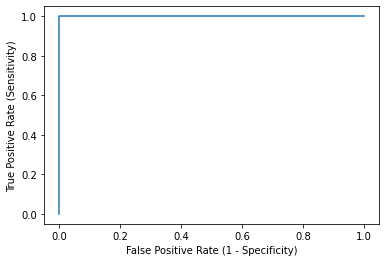

Modelo actual:  SVC
Matriz de confusión
: [[571   5]
 [  0   7]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       576
           1       0.58      1.00      0.74         7

    accuracy                           0.99       583
   macro avg       0.79      1.00      0.87       583
weighted avg       0.99      0.99      0.99       583

True Positives TP: 7
True Negatives TN: 571
False Positives FP: 5
False Negatives FN: 0

 Accuracy =  0.9914236706689536
Sensitivity = 1.0
Precision =  0.5833333333333334
Especifividad =  0.9913194444444444
F1 score =  0.7368421052631579
AUC: 0.996031746031746


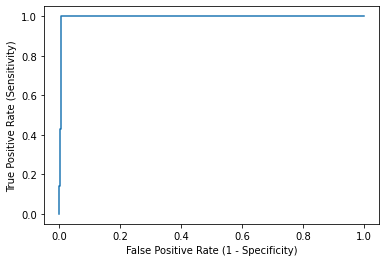

Modelo actual:  LR
Matriz de confusión
: [[570   6]
 [  0   7]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       576
           1       0.54      1.00      0.70         7

    accuracy                           0.99       583
   macro avg       0.77      0.99      0.85       583
weighted avg       0.99      0.99      0.99       583

True Positives TP: 7
True Negatives TN: 570
False Positives FP: 6
False Negatives FN: 0

 Accuracy =  0.9897084048027445
Sensitivity = 1.0
Precision =  0.5384615384615384
Especifividad =  0.9895833333333334
F1 score =  0.7000000000000001
AUC: 0.9987599206349206


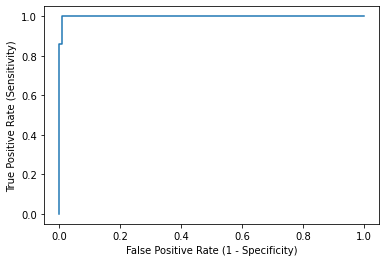

Modelo actual:  DT
Matriz de confusión
: [[576   0]
 [  0   7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       1.00      1.00      1.00         7

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

True Positives TP: 7
True Negatives TN: 576
False Positives FP: 0
False Negatives FN: 0

 Accuracy =  1.0
Sensitivity = 1.0
Precision =  1.0
Especifividad =  1.0
F1 score =  1.0
AUC: 1.0


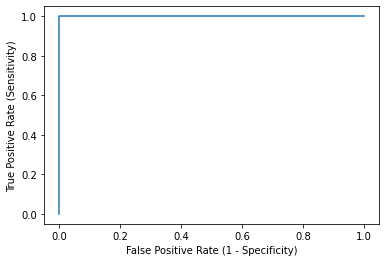

Modelo actual:  GNB
Matriz de confusión
: [[544  32]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       576
           1       0.16      0.86      0.27         7

    accuracy                           0.94       583
   macro avg       0.58      0.90      0.62       583
weighted avg       0.99      0.94      0.96       583

True Positives TP: 6
True Negatives TN: 544
False Positives FP: 32
False Negatives FN: 1

 Accuracy =  0.9433962264150944
Sensitivity = 0.8571428571428571
Precision =  0.15789473684210525
Especifividad =  0.9444444444444444
F1 score =  0.26666666666666666
AUC: 0.9848710317460316


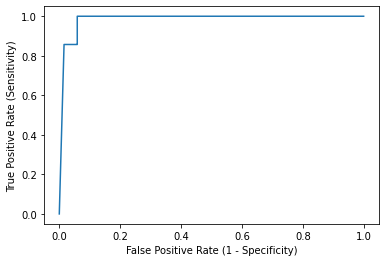

Modelo actual:  RF
Matriz de confusión
: [[576   0]
 [  0   7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       1.00      1.00      1.00         7

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

True Positives TP: 7
True Negatives TN: 576
False Positives FP: 0
False Negatives FN: 0

 Accuracy =  1.0
Sensitivity = 1.0
Precision =  1.0
Especifividad =  1.0
F1 score =  1.0
AUC: 1.0


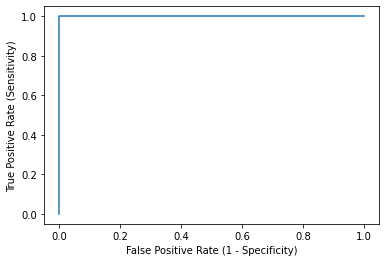

Modelo actual:  GB
Matriz de confusión
: [[576   0]
 [  0   7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       1.00      1.00      1.00         7

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

True Positives TP: 7
True Negatives TN: 576
False Positives FP: 0
False Negatives FN: 0

 Accuracy =  1.0
Sensitivity = 1.0
Precision =  1.0
Especifividad =  1.0
F1 score =  1.0
AUC: 1.0


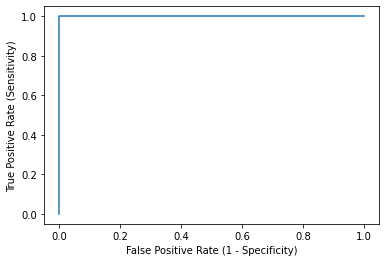

Modelo actual:  MLP
Matriz de confusión
: [[573   3]
 [  0   7]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       576
           1       0.70      1.00      0.82         7

    accuracy                           0.99       583
   macro avg       0.85      1.00      0.91       583
weighted avg       1.00      0.99      1.00       583

True Positives TP: 7
True Negatives TN: 573
False Positives FP: 3
False Negatives FN: 0

 Accuracy =  0.9948542024013722
Sensitivity = 1.0
Precision =  0.7
Especifividad =  0.9947916666666666
F1 score =  0.8235294117647058
AUC: 0.9997519841269841


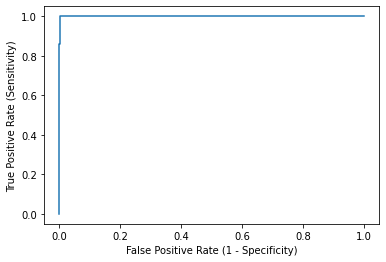

In [ ]:
names = []
accuracy = []
sensitivity = []
precision = []
especifidad = []
aucs = []
f1s = []
for name, model in models:
    names.append(name)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_pred)
    print('Modelo actual: ', name)
    print('Matriz de confusión\n:',cfm)
    print(classification_report(y_test, y_pred))
    # save confusion matrix and slice into four pieces
    confusion = confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    print("True Positives TP:", TP)
    TN = confusion[0, 0]
    print("True Negatives TN:", TN)
    FP = confusion[0, 1]
    print("False Positives FP:", FP)
    FN = confusion[1, 0]
    print("False Negatives FN:", FN)
    
    accu = accuracy_score(y_test, y_pred)
    sens =TP / float(FN + TP)
    pres =  TP / float(TP + FP)
    espe =TN / (TN + FP)
    f1 = metrics.f1_score(y_test, y_pred)
    
    accuracy.append(accu)
    sensitivity.append(sens)
    precision.append(pres)
    especifidad.append(espe)
    f1s.append (f1)
    print("\n Accuracy = ",accu )  
    print("Sensitivity =" ,sens )
    print("Precision = ",pres) 
    print("Especifividad = ",espe )
    print("F1 score = ",f1)

    
    
    y_pred_prod_pos = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prod_pos)
    auc = metrics.roc_auc_score(y_test, y_pred_prod_pos)
    aucs.append(auc)
    print("AUC:",auc )
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')

    plt.show()
    
    

#### Métricas sin cambios

In [ ]:
tr_split = pd.DataFrame({'Name': names, 'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Precision': precision, 'Especifidad': especifidad, 'F1 score': f1s,'AUC': aucs})
tr_split

,Name,Accuracy,Sensitivity,Precision,Especifidad,F1 score,AUC
0,KNN,0.994854,1.000000,0.700000,0.994792,0.823529,1.000000
1,SVC,0.991424,1.000000,0.583333,0.991319,0.736842,0.996032
2,LR,0.989708,1.000000,0.538462,0.989583,0.700000,0.998760
3,DT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,GNB,0.943396,0.857143,0.157895,0.944444,0.266667,0.984871
5,RF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,GB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,MLP,0.994854,1.000000,0.700000,0.994792,0.823529,0.999752


### Ajuste de hiperparámetros


c) Aplicando un ajuste de hiperparámetros de los modelos y evaluándolos de nuevo, el siguiente paso fue probarlos de nuevo los modelos considerando los ajustes realizados. Esto se debe a que los modelos tienen diferentes hiperparámetros que pueden ser ajustados para mejorar el rendimiento del modelo. Para lograrlo, se realizó la función de la búsqueda ávara para encontrar la mejor combinación de estos parámetros por medio de un grid con distintos pesos.

Random forest

In [ ]:
tunnedModels = []

import numpy as np

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'bootstrap': [True]
}
from sklearn.model_selection import GridSearchCV

model =  GridSearchCV(RandomForestClassifier(), param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
model.fit(X_train, y_train)
best_parameters = model.best_params_
print(best_parameters)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
tunnedModels.append(('RF', RandomForestClassifier(bootstrap = True, max_depth=  80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 100)))

Gradient boosting

In [ ]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

model = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
model.fit(X_train, y_train)
best_parameters1 = model.best_params_
print(best_parameters1)


{'learning_rate': 10, 'max_depth': 3, 'n_estimators': 5}


In [ ]:
tunnedModels.append(('GB',GradientBoostingClassifier(learning_rate= 100, max_depth= 3, n_estimators= 500)))


Decision tree

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                    dec_tree__criterion=criterion,
                    dec_tree__max_depth=max_depth)

model = GridSearchCV(pipe, parameters)
model.fit(X, y)
best_parameters = model.best_params_


In [ ]:
print(best_parameters)
tunnedModels.append(('DT', DecisionTreeClassifier(criterion= 'entropy',max_depth= 2)))

{'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 2, 'pca__n_components': 9}


#### Validación cruzada
Implementa procedimiento de validación cruzada para los modelos más sobresalientes


Modelo actual:  RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8)
Matriz de confusión
: [[575   1]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       0.86      0.86      0.86         7

    accuracy                           1.00       583
   macro avg       0.93      0.93      0.93       583
weighted avg       1.00      1.00      1.00       583

True Positives TP: 6
True Negatives TN: 575
False Positives FP: 1
False Negatives FN: 1

Métricas:
Accuracy =  0.9965694682675815
Sensitivity = 0.8571428571428571
Precision =  0.8571428571428571
Especifividad =  0.9982638888888888
F1 score =  0.8571428571428571
AUC: 0.9950396825396824

Aplicando cross-validation
Scores:
 [0.99145299 0.99570815 1.         0.99570815 0.99570815 1.
 1.         1.         1.         0.99570815]
Promedio de las pruebas: 0.9977093737208351


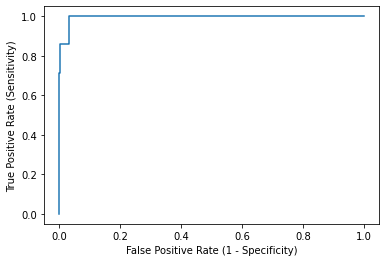



Modelo actual:  GradientBoostingClassifier(learning_rate=100, n_estimators=500)
Matriz de confusión
: [[573   3]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       576
           1       0.67      0.86      0.75         7

    accuracy                           0.99       583
   macro avg       0.83      0.93      0.87       583
weighted avg       0.99      0.99      0.99       583

True Positives TP: 6
True Negatives TN: 573
False Positives FP: 3
False Negatives FN: 1

Métricas:
Accuracy =  0.9931389365351629
Sensitivity = 0.8571428571428571
Precision =  0.6666666666666666
Especifividad =  0.9947916666666666
F1 score =  0.75
AUC: 0.9262152777777778

Aplicando cross-validation
Scores:
 [0.96581197 0.93562232 0.97424893 0.99570815 0.99570815 0.99570815
 0.99141631 0.99141631 0.99141631 0.99141631]
Promedio de las pruebas: 0.9988555055259927


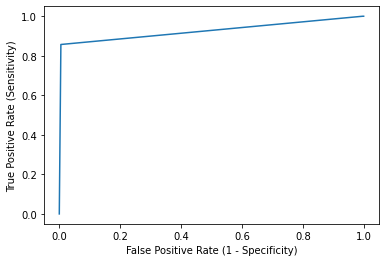



Modelo actual:  DecisionTreeClassifier(criterion='entropy', max_depth=2)
Matriz de confusión
: [[575   1]
 [  1   6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       0.86      0.86      0.86         7

    accuracy                           1.00       583
   macro avg       0.93      0.93      0.93       583
weighted avg       1.00      1.00      1.00       583

True Positives TP: 6
True Negatives TN: 575
False Positives FP: 1
False Negatives FN: 1

Métricas:
Accuracy =  0.9965694682675815
Sensitivity = 0.8571428571428571
Precision =  0.8571428571428571
Especifividad =  0.9982638888888888
F1 score =  0.8571428571428571
AUC: 0.9270833333333334

Aplicando cross-validation
Scores:
 [0.9957265  0.99570815 1.         0.99570815 0.99570815 1.
 1.         1.         1.         1.        ]
Promedio de las pruebas: 0.9988555055259927


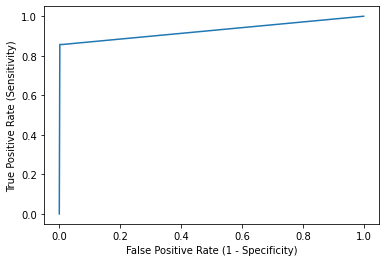

In [ ]:
# importing cross-validation from sklearn package.
from sklearn.model_selection import cross_val_score
namesT = []
accuracyT = []
sensitivityT = []
precisionT = []
especifidadT = []
aucsT = []
f1sT = []
for name, model in tunnedModels:
    namesT.append(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_pred)
    print('Modelo actual: ', model)
    print('Matriz de confusión\n:',cfm)
    print(classification_report(y_test, y_pred))
    # save confusion matrix and slice into four pieces
    confusion = confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    print("True Positives TP:", TP)
    TN = confusion[0, 0]
    print("True Negatives TN:", TN)
    FP = confusion[0, 1]
    print("False Positives FP:", FP)
    FN = confusion[1, 0]
    print("False Negatives FN:", FN)
    
    accu = accuracy_score(y_test, y_pred)
    sens =TP / float(FN + TP)
    pres =  TP / float(TP + FP)
    espe =TN / (TN + FP)
    f1 = metrics.f1_score(y_test, y_pred)
    
    accuracyT.append(accu)
    sensitivityT.append(sens)
    precisionT.append(pres)
    especifidadT.append(espe)
    f1sT.append (f1)


    print("\nMétricas:\nAccuracy = ",accu )  
    print("Sensitivity =" ,sens )
    print("Precision = ",pres) 
    print("Especifividad = ",espe )
    print("F1 score = ",f1)

    y_pred_prod_pos = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prod_pos)
    auc = metrics.roc_auc_score(y_test, y_pred_prod_pos)
    aucsT.append(auc)
    print("AUC:",auc )
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')

    print("\nAplicando cross-validation")
    scores = cross_val_score(model, X, y, cv=10)
    print("Scores:\n", scores)
    promedio = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    print("Promedio de las pruebas:",promedio)
    plt.show()
    print("\n")

#### Métricas con hiperparámetros y cross-validation

In [ ]:
tr_split = pd.DataFrame({'Name': namesT, 'Accuracy': accuracyT, 'Sensitivity': sensitivityT, 'Precision': precisionT, 'Especifidad': especifidadT, 'F1 score': f1sT,'AUC': aucsT})
tr_split

,Name,Accuracy,Sensitivity,Precision,Especifidad,F1 score,AUC
0,RF,0.996569,0.857143,0.857143,0.998264,0.857143,0.995040
1,GB,0.993139,0.857143,0.666667,0.994792,0.750000,0.926215
2,DT,0.996569,0.857143,0.857143,0.998264,0.857143,0.927083


#### Proceso realizado


Durante esta fase individual de la modelación de los datos, el primer paso fue mostrar la información general de los datos y su respectiva descripción para el análisis. Todas las variables seleccionadas previamente por el equipo eran categóricas por lo que no se le podría sacar un análisis tan profundo. 

#### Elección de la variable Target
Posteriormente se determinó que la variable target es:
[Ingresado Si/No] ya que a partir de ella se puede determinar cuales son las características que las personas interesadas deben de tener para poder entrar a la compañía Ternium según sus aptitudes para el conocimiento y su forma de trabajar. Esta se utilizó para hacer los pronósticos y las variables predictoras corresponden a la variables de las pruebas realizadas (las soft-skills y las técnicas), destacado, apto y apto_suma, esta elección se debe a que creo que son las que engloban de mejor manera todas las pruebas realizadas por ternium en una variable con orden ascendente dependiendo de que tan adecuado es el aplicante para el trabajo. En relación con lo anterior, también lo creí pertinente ya que entre menos features es mejor para el modelo en cuanto al aumento de la precisión de la clasificación a través de la eliminación de estas características redundantes. Además, el proceso de modelado es más eficiente en tiempo y recursos para los modelos de aprendizaje supervisado, por medio de la elección de las características elegidas el modelo se vuelve más sencillo, fácil de comprender y construir.


#### Modelos utilizados
Posteriormente, se definieron los modelos a utilizar. Como utilizaremos un sistema que aprende gracias al entrenamiento de datos históricos recolectados por la base de datos, se trata de un modelo supervisado o modelado predictivo. Este se separa en dos categorías, pero como estamos intentando predecir si los postulados entrarán a la compañía o no, entonces la variable target maneja datos categóricos (Si/No), por lo tanto se está refiriendo a un sistema de clasificación.

En relación con lo anterior, el modelo aprende a encontrar patrones en el dataframe para intentar predecir la variable target, como la predicción consta de dos resultados, se trata de una clasificación binaria, por lo que trataremos con lo siguientes modelos:


MODELOS:
- KNeighborsClassifier
- SVC
- LogisticRegression
- DecisionTreeClassifier
- GaussianNB
- RandomForestClassifier
- GradientBoostingClassifier
- MLPClassifier

Después de haber preprocesado la información, el dataframe se divide aleatoriamente en dos y se define el 80% y 20% para el entrenamiento y prueba del modelo. Esto se debe a que el modelo aprende del set de entrenamiento para hacer las predicciones por medio de lo aprendido. Posteriormente, se comparó la predicción con la variable target para determinar que tan bueno es el modelo.

El siguiente paso fue probar todos los modelos de clasificación para generar predicciones. Después de evaluar las métricas como accuracy, matriz de confusión, precisión, sensitividad, especificidad, ROC-AUC para comparar los modelos. En general tuvieron un buen puntaje de acuerdo con estas métricas generalmente entre 0.99 y 1, sin embargo, el modelo probablemente esté cayendo en overfitting ya que la base de datos es muy pequeña y estaba desbalanceada, es decir, había muchos de una clase y muy pocos de otra.

Para tratar con este problema, se realizó unn balance por medio del método oversampling, realizando copias para que la clase minoritaria tenga la misma cantidad de registros que la clase mayoritaria. De los cuales, se observaron diferentes cambios dentro de la precisión general de este balance, por lo que se eligieron 3 de estos modelos para poder hacer pruebas y encontrar los hiperpárametros para mejorar su rendimiento.


#### Conclusiones
Estos tres modelos analizados fueron: 
- Random forest
- Gradient Boosting
- Decision tree

Igualmente, se realizó un ajuste de hiperparámetros de los modelos y se evaluaron de nuevo, probando de nuevo los modelos considerando los ajustes realizados. Estos fueron definidos por medio de consideración usando diferentes heurísticas (en este caso la búsqueda ávara) y la prueba de diferentes posibilidades para encontrar estos valores óptimos. 

Se buscó que al realizar estos métodos se pudiera mejorar la métrica de precisión, esta explica cuantos de los casos que fueron predecidos realmente fueron verdaderos. Esto nos ayuda en el contexto de la problemática ya que es más importante un Falso Positivo que un Falso negativo. Esta importancia deriva en que puede causar daño a la compañía cuando una persona que no es apta para la empresa es reclutada y realmente no aporta nada en ella, por lo tanto representa una pérdida de recursos y le quita el lugar a alguien que verdaderamente puede hacer una diferencia.

Por último, se implementó el procedimiento de validación cruzada para los modelos, este proceso ayudó a evitar el overfitting debido a la partición en k grupos de todo el dataset. 

Como se puede observar, las métricas cambiaron considerablemente, con respecto a la evaluación realizada sin ninguna técnica aplicada. Esto significa que al cambiar los valores esto ayuda a los modelos a reducir el overfitting o que este se vuelva demasiado específico y flexible. Aún así, los resultados fueron bastante favorables en la métrica de accuracy, pero tenemos que considerar que esta no es una buena métrica tratándose de datos desbalanceados, posteriormente analizando sensitividad y especificidad los tres modelos tuvieron la misma evaluación, en las métricas restantes el mejor modelo fue el de Random Forest, por lo que se elige como el mejor modelo a utilizar.